In [1]:
%matplotlib inline

In [2]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob #to read the files
from sklearn.decomposition import PCA
from ipywidgets import *
from tabulate import tabulate #to export in table format
from scipy import interpolate
import scipy.interpolate as interp
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate
from astropy import constants as const

In [3]:
filter_y = []
filter_z = []

In [4]:
file = open("B_CSP2_tel_ccd_atm_ext_1.2.txt")
lines = file.readlines()
file.close()

In [5]:
for line in lines:

    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    filter_y.append(co[0])
    filter_z.append(co[1])

filter_y = np.array(filter_y, dtype=float)
filter_z = np.array(filter_z, dtype=float)

In [6]:
f_filter = interp1d(filter_y, filter_z)

<IPython.core.display.Javascript object>


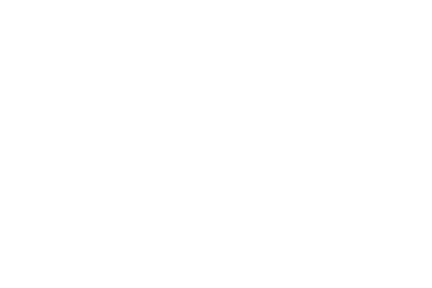

In [7]:
%matplotlib notebook
plt.plot(filter_y, filter_z, 'k')
plt.show()

In [8]:
x = np.linspace(-10,50,61)
y = np.linspace(3000,9000,601)

In [9]:
file = open("max_valuesB.txt")
lines = file.readlines()
file.close()

snname = []
maxvalue = []

for line in lines:

    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    maxvalue.append(co[1])
    snname.append(co[0])

maxvalue = np.array(maxvalue, dtype=float)

In [10]:
sn_names=glob.glob("*.dat")
print(len(sn_names))

85


In [11]:
for i in range(0,len(sn_names)):

    sn_names[i] = sn_names[i][:-4]

In [12]:
factors = []
names = []

In [13]:
#hist = []

In [14]:
max_list = []

In [15]:
list_data = []
for k in range(0,len(sn_names)):
    
    x_lc = []
    z_lc = []

    print(sn_names[k])

    N = sn_names[k]+".dat"


    file = open(N)
    lines = file.readlines()
    file.close()

    xtemp = []

    for line in lines:

        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        xtemp.append(co[0])

    xtemp = np.array(xtemp, dtype=float)


    z = np.reshape(xtemp, (601, 61))

    zz = []
    xx = []
    yy = []

    for i in range(0,len(y)):

        for j in range(0,len(x)):

            zz.append(z[i][j])
            xx.append(x[j])
            yy.append(y[i])

    
    for j in range(0,len(x)):

        y_temp = []
        z_temp = []

        for i in range(0,len(xx)):

            if xx[i] == x[j]:

                y_temp.append(yy[i])
                z_temp.append(zz[i])

        f = interp1d(y_temp, z_temp)

        def S(x): return f(x)*f_filter(x)
        
        z_lc.append(integrate.quad(S, min(filter_y), max(filter_y))[0])
        x_lc.append(x[j])        
        
    list_data.append([x_lc, z_lc]) 
    
        
    #print(z_lc)
        
    #print(j)

    maxvaluecalc = max(z_lc)
    
    #print(maxvaluecalc)
    if sn_names[k] in snname:
        idx = snname.index(sn_names[k])
        max_list.append([maxvaluecalc, maxvalue[idx], sn_names[k]])  
        
        factors.append(maxvalue[idx]/maxvaluecalc)
        names.append(sn_names[k])
        


SN2013ew
SN2002bo
SN1999by
SN2010ae
SN2007on
SN2000cx
SN2002ck
SN2009D
SN2006D
SN2007af
SN1995D
SN2001N
SN1972E
SN2012fr
SN2008Z
SN2015bp
SN2007ux
SN2009ad
SN2006gt
SN2003du
SN2006cp
SN2002de
SN2006sr
SN2005cf
SN2007bc
SN2002cr
SN1998aq
SN2002eu
SN2000cn
SN2003fa
SN2006ac
SN2009aa
SN2001cp
SN2013bh
SN2002fb
SN1998bp
SN2009Y
SN2001da
SN2008ar
SN2005eu
SN1999gp
SN2012hr
SN2001bg
SN1994D
iPTF14bdn
SN1997bq
SN2007ax
SN2008s1
SN1998dh
SN2005kc
SN2002fk
SN2008bf
SN2003kc
SN2002jy
SN2002dp
SN2001bf
SN2004fu
SN2002cs
SN2007hj
SN2002ha
SN2002hw
SN2007qe
SN2001V
SN1999ac
SN1997dt
SN2005bl
SN2006gj
SN1995al
SN2007kk
iPTF13dge
SN2003it
SN1999aa
SN2005am
SN1994ae
SN2006gr
SN2001en
SN2007F
SN2006bt
SN2001ep
SN1996X
SN2007ci
SN2004at
SN2003kf
SN2007le
SN2006ax


In [16]:
max_list

[[5.085624766620414e-12, 1.27784, 'SN2002bo'],
 [8.857856249789007e-12, 1.84043, 'SN1999by'],
 [1.1915338713179714e-11, 3.16247, 'SN2007on'],
 [1.7621775211319695e-11, 2.28965, 'SN2000cx'],
 [4.597637697256766e-12, 1.0081, 'SN2006D'],
 [1.5719847085865025e-11, 2.56275, 'SN2007af'],
 [1.0828533592463709e-11, 2.14464, 'SN1995D'],
 [4.296497395623115e-11, 7.99236, 'SN2012fr'],
 [1.5683860816230151e-12, 0.14237, 'SN2008Z'],
 [7.0160887368022715e-12, 1.45675, 'SN2015bp'],
 [3.9426162114917083e-13, 0.135283, 'SN2009ad'],
 [1.0353756874851755e-11, 2.141, 'SN2003du'],
 [1.2829688870144144e-12, 0.213995, 'SN2006cp'],
 [6.213347781334993e-13, 0.112941, 'SN2002de'],
 [8.617536822029121e-13, 0.13654, 'SN2006sr'],
 [1.0656868116587713e-11, 1.94938, 'SN2005cf'],
 [9.924460184069117e-13, 0.227122, 'SN2007bc'],
 [5.14160216753563e-12, 1.04919, 'SN2002cr'],
 [3.265841611619418e-11, 5.98842, 'SN1998aq'],
 [2.910880334130441e-13, 0.106885, 'SN2000cn'],
 [4.603796706824166e-13, 0.104722, 'SN2003fa'],
 [7.

<IPython.core.display.Javascript object>


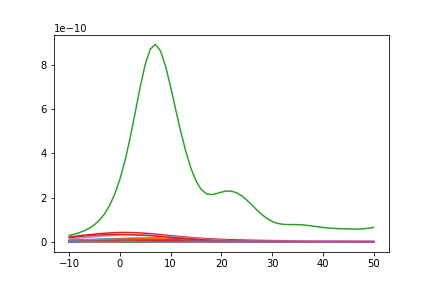

In [24]:
%matplotlib notebook

for i in range(0,len(list_data)):
    
    plt.plot(list_data[i][0],list_data[i][1])
    
    
#plt.ylim(0,7*10**(-11))
plt.show()

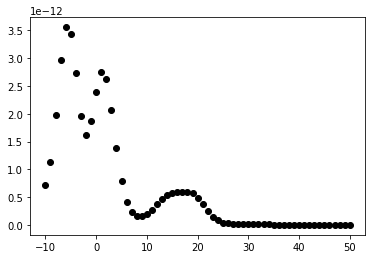

In [18]:
%matplotlib inline
plt.plot(x_lc,z_lc,'ko')
plt.show()

In [19]:
max(z_lc)

3.558594105618115e-12

In [20]:
z_lc

[7.102829386422518e-13,
 1.1323348472168735e-12,
 1.98322004511814e-12,
 2.96563279830589e-12,
 3.558594105618115e-12,
 3.431849136991838e-12,
 2.7279675204411814e-12,
 1.9582427504844745e-12,
 1.6240753157075893e-12,
 1.867922800308173e-12,
 2.4009461109187235e-12,
 2.7509969237804487e-12,
 2.6238265392103835e-12,
 2.0736686953375666e-12,
 1.3776379029186375e-12,
 7.922704098312719e-13,
 4.194350882988111e-13,
 2.316949116932212e-13,
 1.603016322015871e-13,
 1.5454945848589078e-13,
 1.931212341132555e-13,
 2.6857089143885413e-13,
 3.680947468270917e-13,
 4.664046293291117e-13,
 5.370274314720854e-13,
 5.715829837182036e-13,
 5.844975010050538e-13,
 5.935086638692779e-13,
 5.957615526501335e-13,
 5.67981815616856e-13,
 4.918277248102242e-13,
 3.7582136762201205e-13,
 2.5095298828475384e-13,
 1.4793015115292339e-13,
 8.007801736457999e-14,
 4.338980985117603e-14,
 2.6552428702109893e-14,
 1.9524255276249496e-14,
 1.6396040600548278e-14,
 1.4554338916925086e-14,
 1.3088922330641419e-14,


In [21]:
save_path = '/home/joao/Documentos/PCA'

In [22]:

table = []
for l in range(0,len(names)):
    table.append((names[l],factors[l]))

name_of_file = "factors"

completeName = os.path.join(save_path, name_of_file+".txt")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [23]:
factors

[251265096942.88202,
 207773748873.36188,
 265411674491.63235,
 129932993273.52661,
 219264776039.55063,
 163026394977.10977,
 198054517879.74286,
 186020361798.47095,
 90774842794.23792,
 207629928104.92078,
 343130025199.2192,
 206784843982.60074,
 166796718272.71344,
 181771573030.6885,
 158444347636.5091,
 182922410099.61786,
 228850734233.96814,
 204058961742.44006,
 183365291773.30646,
 367191322661.94464,
 227468775597.262,
 234821223726.4666,
 220806142424.99045,
 155566017002.97614,
 144270968857.23813,
 294796060712.48456,
 97136601466.65584,
 176951585198.11465,
 182145138764.8184,
 122905493978.98132,
 105745970326.39954,
 273383387651.4412,
 178743924561.8627,
 366338831740.1357,
 182894557202.23328,
 218325501338.81915,
 121428194050.76656,
 198776275515.19528,
 287888784777.4655,
 210690706298.27606,
 208364963355.33185,
 182079286569.45718,
 236370457136.89957,
 165498929328.66843,
 160134035541.4039,
 190943680157.50446,
 378324858270.915,
 120064396649.63896,
 1340794